<a href="https://colab.research.google.com/github/swastikarm/Machine-Learning/blob/main/Box_Plots_for_Numerical_Values%5B1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Develop a program to create histograms for all numerical features and analyze the distribution of each feature. Generate box plots for all numerical features and identify any outliers. Use California Housing dataset.

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

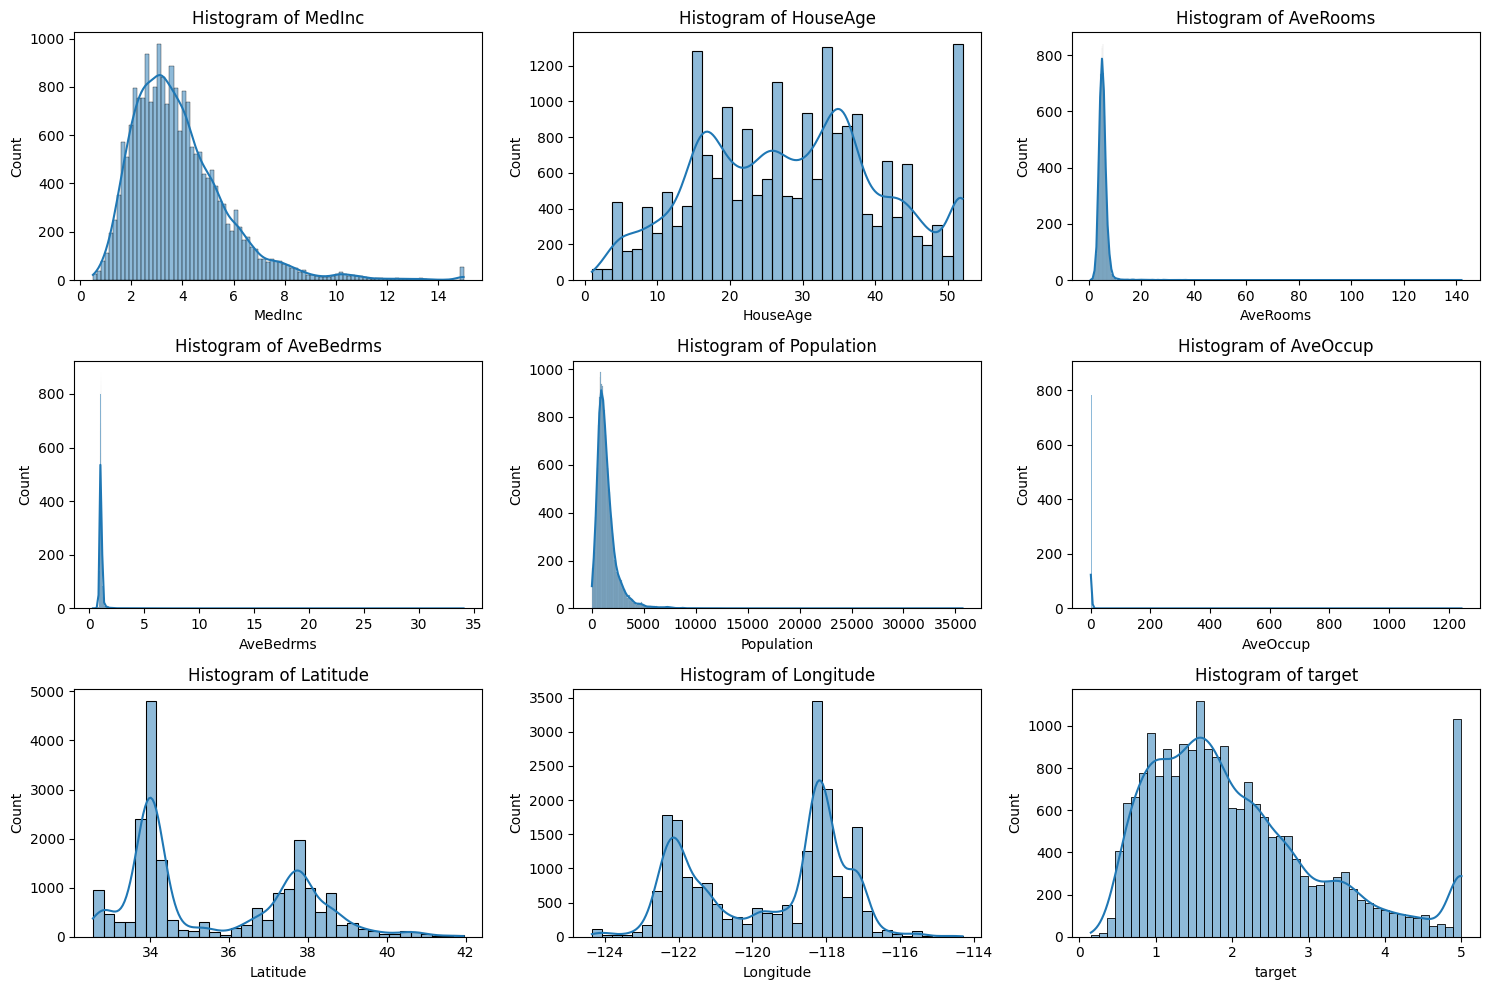

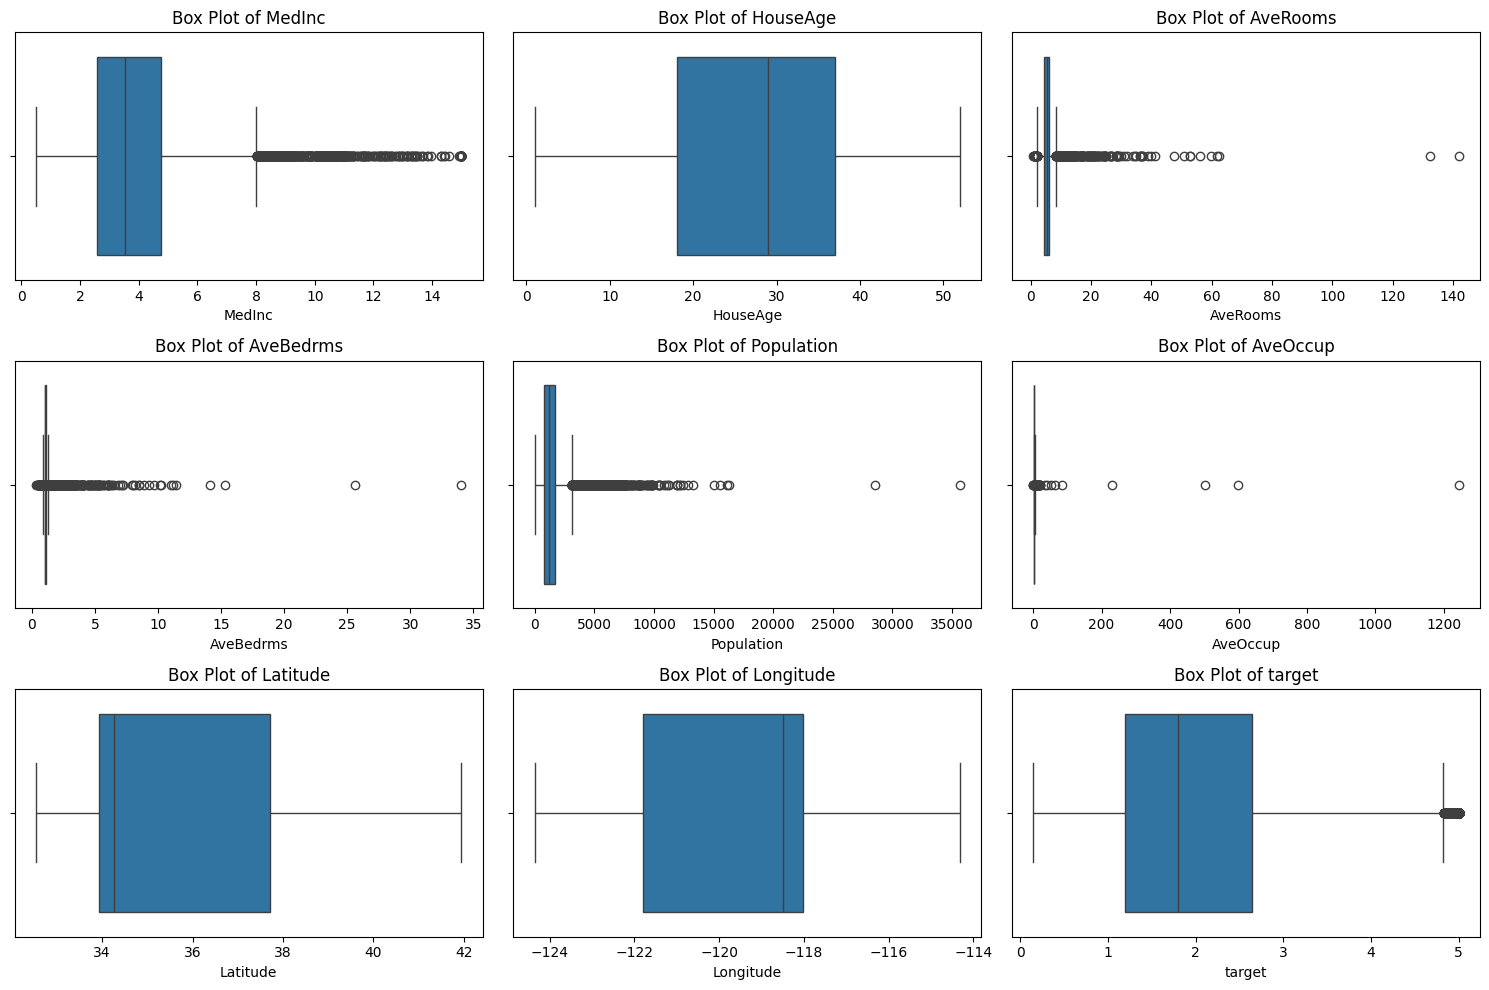


Skewness of numerical features:
MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
target         0.977763
dtype: float64

Number of outliers in each feature:
{'MedInc': 681, 'HouseAge': 0, 'AveRooms': 511, 'AveBedrms': 1424, 'Population': 1196, 'AveOccup': 711, 'Latitude': 0, 'Longitude': 0, 'target': 1071}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Step 1: Load the California Housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target  # Adding target column to dataframe

# Step 2: Plot histograms for each numerical feature
num_features = data.columns  # All columns are numerical

# Set up the plotting area
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.tight_layout()

plt.show()

# Step 3: Plot box plots for each numerical feature to identify outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.tight_layout()

plt.show()

# Step 4: Analyze the distribution
# You can check the skewness, kurtosis, or other statistical properties.
# Example: Checking skewness of each feature
skewness = data.skew()
print("\nSkewness of numerical features:")
print(skewness)

# Example: Checking the presence of outliers based on the interquartile range (IQR)
def find_outliers(df):
    outliers = {}
    for feature in df.columns:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Finding outliers
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].shape[0]

    return outliers

outliers = find_outliers(data)
print("\nNumber of outliers in each feature:")
print(outliers)
